Image Recommendation System Using Autoencoder



This notebook builds and trains an autoencoder neural network to extract latent features from product images. These features are used to recommend visually similar items.

The notebook is structured as follows:
- Import libraries and define constants
- Uses cv2, NumPy, and Keras layers/models like Conv2D, MaxPooling2D, UpSampling2D.
- Load and preprocess images
- Reads, resizes (128x128), normalizes, and reshapes images from train folder.
- Build autoencoder architecture
- Defines a convolutional encoder-decoder model using Keras.
- Compile and train the model
- Trains the model with MSE loss and Adam optimizer.
 - Save the trained model
 - Exports model to a file (autoencoder.h5) for later inference.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import PIL
import shutil

c:\Users\Sanika\anaconda3\envs\myenv\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Imports TensorFlow and Keras modules for building neural networks, along with PIL for image processing and shutil for file operations.


In [ ]:
# Configuration
train_directory = r"data\Train\train"
test_directory = r"data\Test\test"
batch_size = 64
image_size = (32, 32)
epochs = 25
model_path = "encoder_model.keras"

Sets configuration variables for data directories, batch size, image dimensions, number of training epochs, and the model save path.


In [3]:
def create_data_generator(base_directory, batch_size, image_size):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        base_directory,
        target_size=image_size,
        batch_size=batch_size,
        class_mode=None,
        shuffle=True,
        color_mode='rgb'
    )
    return generator

def create_autoencoder_generator(image_generator):
    for batch in image_generator:
        yield (batch, batch)

train_generator = create_data_generator("data", batch_size, image_size)
test_generator = create_data_generator("data", batch_size, image_size)

Found 44364 images belonging to 2 classes.
Found 44364 images belonging to 2 classes.


Defines functions to create image data generators that load and rescale images from directories, and a generator that yields image batches as both input and output for training an autoencoder.  
Initializes training and testing generators using these functions.


In [4]:
def build_autoencoder(input_shape):
    encoder = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu')  # Latent space
    ])

    decoder = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(32,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(input_shape[0] * input_shape[1] * input_shape[2], activation='sigmoid'),
        layers.Reshape(input_shape)
    ])

    autoencoder = models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

input_shape = image_size + (3,)  # RGB
autoencoder = build_autoencoder(input_shape)

c:\Users\Sanika\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Sanika\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Builds a convolutional autoencoder model with an encoder that compresses the input image to a 32-dimensional latent space and a decoder that reconstructs the image.  
The model is compiled with Adam optimizer and binary cross-entropy loss.


In [ ]:
import os

model_path = "model/encoder_model.keras"

autoencoder_train_generator = create_autoencoder_generator(train_generator)
autoencoder_test_generator = create_autoencoder_generator(test_generator)

history = autoencoder.fit(
    autoencoder_train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=autoencoder_test_generator,
    validation_steps=len(test_generator),
    epochs=epochs
)

os.makedirs(os.path.dirname(model_path), exist_ok=True)
autoencoder.save(model_path)
print("Autoencoder trained and saved at:", model_path)

Epoch 1/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 2427s 3s/step - loss: 0.3089 - val_loss: 0.2300
Epoch 2/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 1740s 3s/step - loss: 0.2251 - val_loss: 0.2175
Epoch 3/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 1741s 3s/step - loss: 0.2179 - val_loss: 0.2167
Epoch 4/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 1736s 3s/step - loss: 0.2127 - val_loss: 0.2103
Epoch 5/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 1637s 2s/step - loss: 0.2092 - val_loss: 0.2084
Epoch 6/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 2375s 3s/step - loss: 0.2073 - val_loss: 0.2064
Epoch 7/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 3611s 5s/step - loss: 0.2063 - val_loss: 0.2052
Epoch 8/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 2375s 3s/step - loss: 0.2052 - val_loss: 0.2062
Epoch 9/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 1482s 2s/step - loss: 0.2042 - val_loss: 0.2035
Epoch 10/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 1236s 2s/step - loss: 0.2029 - val_loss: 0.2034
Epoch 11/25
694/694 ━━━━━━━━━━━━━━━━━━━━ 1151s 2s/step - loss: 0.2029 - val_loss: 0.2021
Epoch 12/25
694/694 ━━━━━━━━━━

Trains the autoencoder using the generated training data, validates on test data, and saves the trained model to the specified path, creating directories if needed.


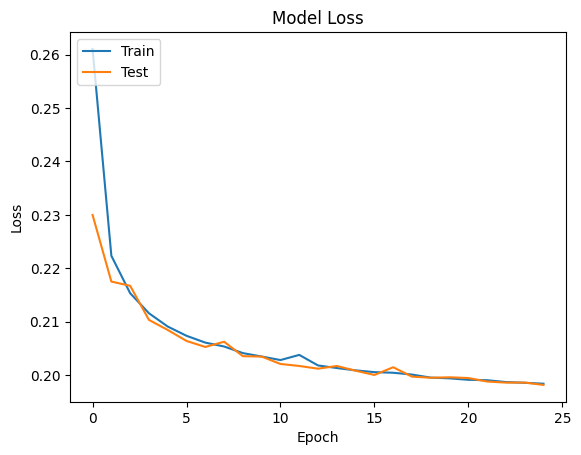

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plots the training and validation loss curves over epochs to visualize the autoencoder’s learning progress.


In [ ]:
shutil.move("model/encoder_model.keras", "backend/model/encoder_model.keras")